# ORIE 4580/5580/5581 Assignment 3

#### Students: Chenxin Fang (cf348) and Aaron Ye (ajy33)

### Github link: [Github link](https://github.com/MelindaFang-code/orie4580/blob/main/HW3.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
plt.rcParams["figure.figsize"] = (5,5)
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)

        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
# Make sure we have the packages we need
import numpy as np
from scipy import stats
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)
    xs = np.zeros(n)
    xs[0] = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (xs[i] + 1.0) / (m + 1.0)
        # Update the LCG state using the specified parameters
        if i+1 < n:
          xs[i+1] = (a * xs[i] + c) % m

    return output, xs

\begin{align*}
    u_n &= \frac{x_n+1}{m+1} \\
	x_{n+1}  &=  (ax_n + c) \mbox{ mod }  m
\end{align*}

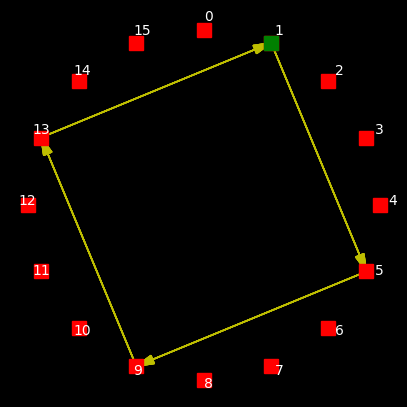

In [ ]:
# Ans
m = 16
a = 5
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x, xs = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

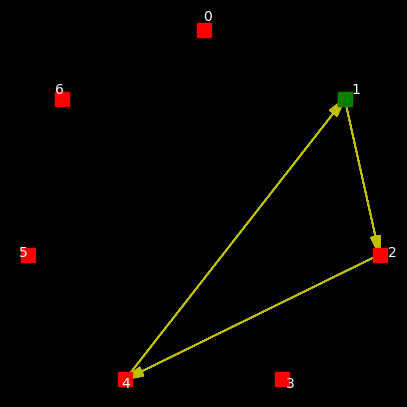

In [ ]:
# Ans
m_y = 7
a_y = 2
c_y = 0
seed = 1

fig = plt.figure(figsize=(5,5))
y, ys = LCG(n=m+1,m=m_y,a=a_y,c=c_y,seed = seed)

plot_clock_face(m_y,fig,annotate = True)
plot_clock_path(m_y,y,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

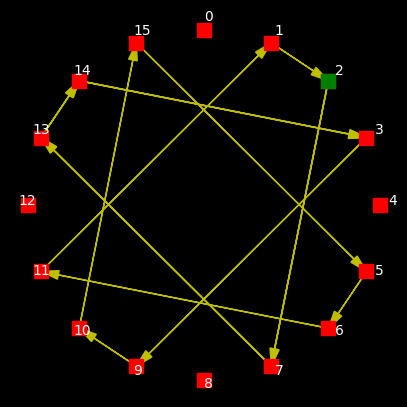

In [ ]:
fig = plt.figure(figsize=(5,5))
z = (xs + ys)%16
w = (z + 1.0)/(16+1.0)

plot_clock_face(16,fig,annotate = True)
plot_clock_path(16,w,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.


period for $x_n$ is 4 \
period for $y_n$ is 3 \
period for $z_n$ is 12

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.


\begin{align*}
F^{-1}(y) =
\begin{cases}
y & \mbox{for $0 \leq y < \frac{1}{2}$}, \\
\frac{1}{2} & \mbox{for $\frac{1}{2}\leq y < 1$} \\
\text{undefined else where}
\end{cases}
\end{align*}

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

\begin{align*}
F(k) = 1 - (1-p)^k & \text{ for k in {1, 2, 3..}}\\
F^{-1}(y) = \inf\{k|1 - (1-p)^k\geq y\} & \text{ for y in {1, 2, 3..}}\\
\end{align*}

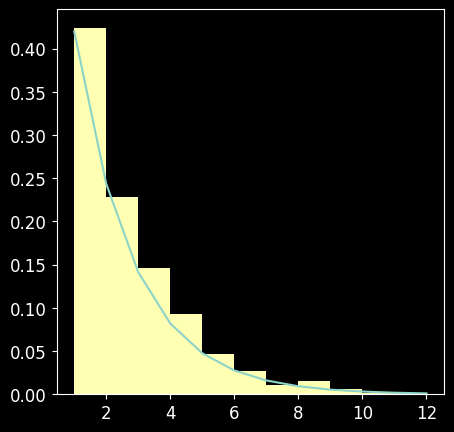

In [ ]:
import numpy as np
from scipy.stats import geom, uniform
import matplotlib.pyplot as plt
p,n = 0.42, 1000
rvs = np.random.rand(n)
output = geom.ppf(rvs, p)
x = np.arange(1, 13)
plt.plot(x, geom.pmf(x,p))
plt.hist(output, density=True, bins=x)
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

\begin{align*}
F(k) =
\begin{cases}
e^{x-2} - e^{-2} & \text{for }0 \leq x \leq 2, \\
-e^{-x} + 1 & \text{for }  x \gt 2, \\
\end{cases}\\
F^{-1}(y) = \begin{cases}
0 &\text{for y < 0}\\
ln(y + e^{-2}) + 2 & \text{for }0 \leq y \leq 1 - e^{-2}, \\
-ln(1-y) & \text{for }  y \gt 1 - e^{-2}, \\
\end{cases}\\
\end{align*}

We now get the cdf $F$ of $k$, and we find the inverse $F^{-1}$.  Then:

1.   Generate $U \sim Unif[0,1]$.
2.   Set $k = F^{-1}(U)$.

In [ ]:
import math
f1 = lambda x: math.log(x + math.exp(-2)) + 2
f2 = lambda x: - math.log(1-x)
bound = 1 - math.exp(-2)
r = uniform.rvs(size=n)
output = np.zeros(n)
for i, rv in enumerate(r):
  if rv <= bound:
    output[i] = f1(rv)
  else:
    output[i] = f2(rv)

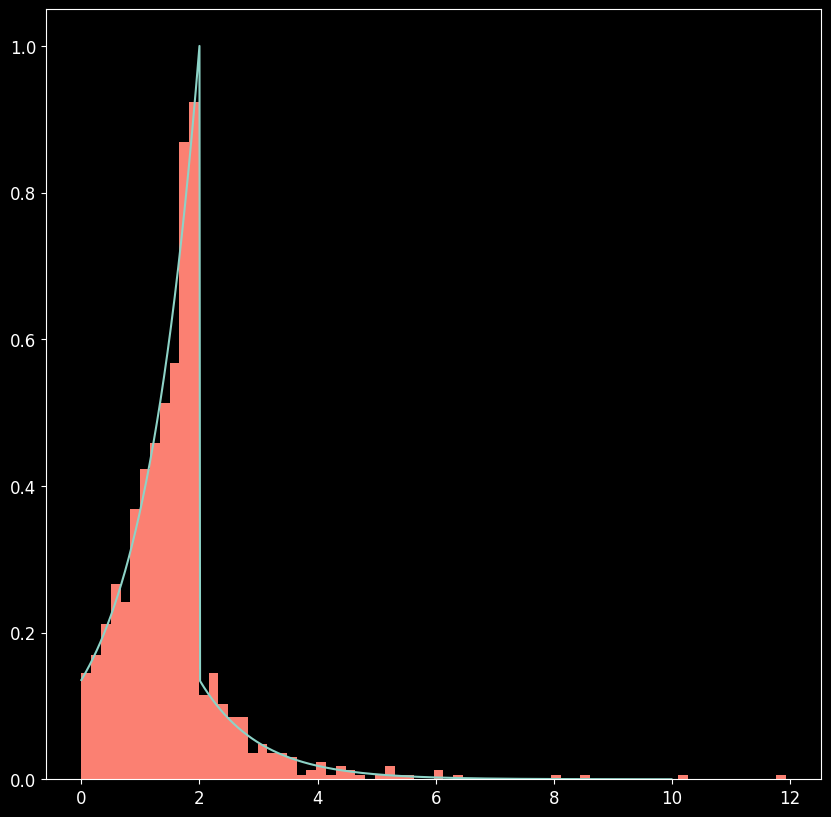

In [ ]:
ypoints = [i for i in range(0, 1000)]
x = np.arange(0,10,0.01)
for i,y in enumerate(ypoints):
  ypoints[i] = math.exp(y/100-2) if y <= 200 else math.exp(-y/100)
plt.plot(x, ypoints)
plt.hist(output,density=True, color = cmap(3), bins='auto')
plt.show()

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


$X$ is strictly increasing, so max of x is achieved by setting x = 1, max f(x) = 13/4 \
$X$ has support $[0,1]$.  Given the pdf $f$ of $X$ with a maximum of 13/4, imagine drawing a box to enclose $f$.  

1.   Generate $(U,V)$ with $U \sim Unif[0,1]$ and $V \sim Unif[0,13/4]$.
2.   If $V \leq f(U)$, then keep $X = U$.  Else reject and go back to step 1.

___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

P(V <= f(U)) = 1/(13/4) = 4/13 \
The number of trials is of $Geom(\frac{13}{14})$ distribution\
E[number of samples] = 2/P(V <= f(U)) = 13/2 samples \
we need to multiply by 2 because for each point accepted we need to draw from the uniform distribution twice

### Ans.


___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


In [ ]:
from itertools import filterfalse
N = 2500
samples = []
f = lambda x: (5*pow(x,4) + 4*pow(x,3) + 3*pow(x, 2) + 1)/4

finish = False
while len(samples) < 2500:
  u = np.random.rand()
  v = np.random.rand()
  if 13*v/4 <= f(u):
    samples.append(u)


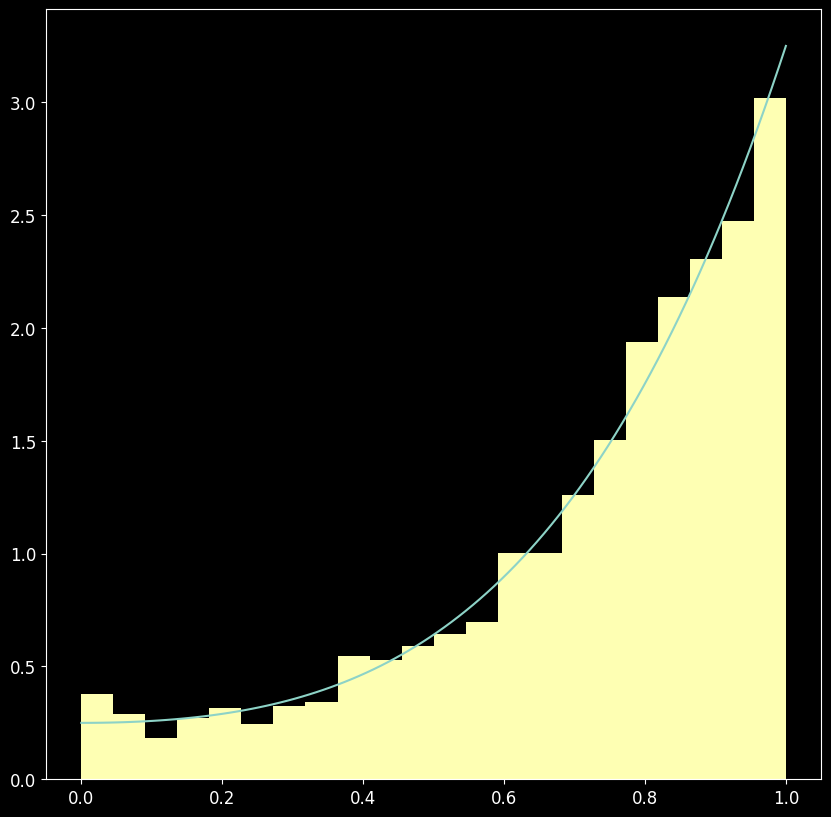

In [ ]:
x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y)
plt.hist(samples, density = True, bins = "auto")
plt.show()

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

We first get the cdf $F$ of $x$, and we find the inverse $F^{-1}$.  Then:

1.   Draw sample $U \sim Unif[0,1]$.
2.   Set $x = F^{-1}(U)$.

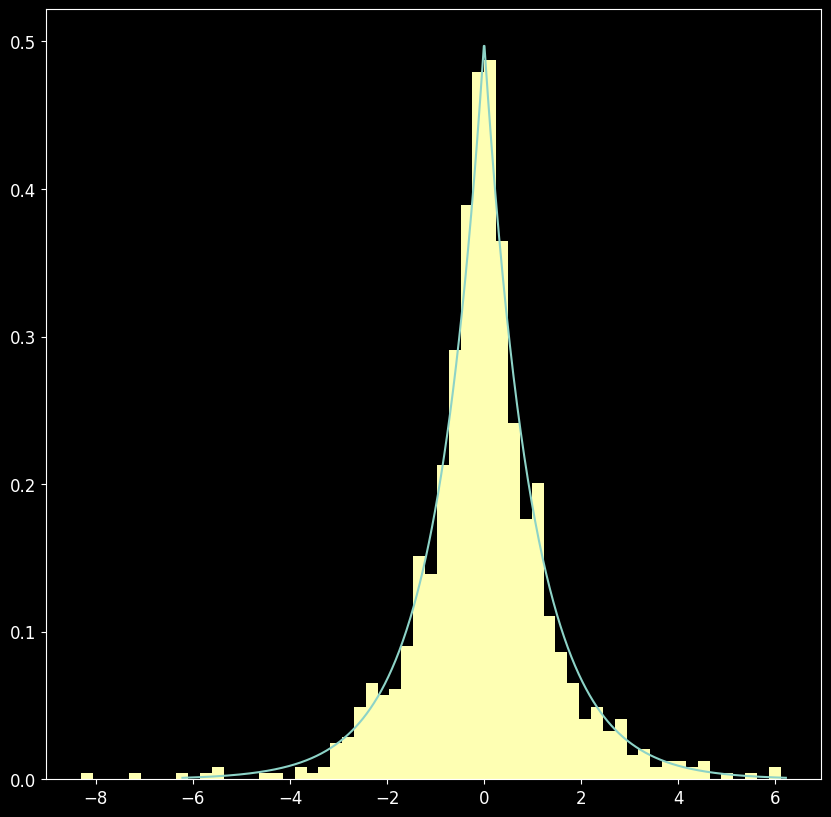

In [ ]:
from scipy.stats import laplace
n = 1000
rvs = np.random.rand(n)
output = laplace.ppf(rvs)
x = np.linspace(laplace.ppf(0.001),
                laplace.ppf(0.999), 1000)

plt.plot(x, laplace.pdf(x))
plt.hist(output, density=True, bins='auto')
plt.show()

___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.

\begin{align*}
k \ge max \frac{f(x)}{g(x)} \\
k \ge max\frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{e^{-|x|}/2} \\
\frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{e^{-|x|}/2} = \frac{2}{\sqrt{2\pi}}(exp(\frac{-x^2}{2} + |x|)) \\
\text{the function is symmetric by x=0}. \\
\text{assume x < 0, we calculate the derivative and find the x that maximizes the equation} \\
-(x+1)(exp(\frac{-x^2}{2} + |x|)) = 0 \\
x = -1 \\
\text{plug in x = -1, we get k = $\sqrt{\frac{2e}{\pi}}$}
\end{align*}


1.   Draw sample $U \sim $ laplace distribution.
2.   Draw sample $V \sim Unif[0, k\cdot g(U)]$. $g(x)$ is the pdf of laplace distribution
3.   If $V < f(U)$, where f is the pdf of normal distribution, then keep $X = U$. Else reject and go back to step 1.

P(the point generated is accepted) = 1/k \
E(number of simulation needed) = 2/P(point get accepted) = 2k = $2\sqrt{\frac{2e}{\pi}}$


___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

In [ ]:
k = pow(2*math.exp(1)/math.pi, 0.5)
f = scipy.stats.norm.pdf
g = laplace.pdf

N = 1000
trials = []
ct = 2
samples = []
while len(samples) < N:
  u = np.random.rand()
  u = laplace.ppf(u)
  v = np.random.rand()
  if v * k * g(u) <= f(u):
    samples.append(u)
    trials.append(ct)
    ct = 2
  else:
    ct += 2

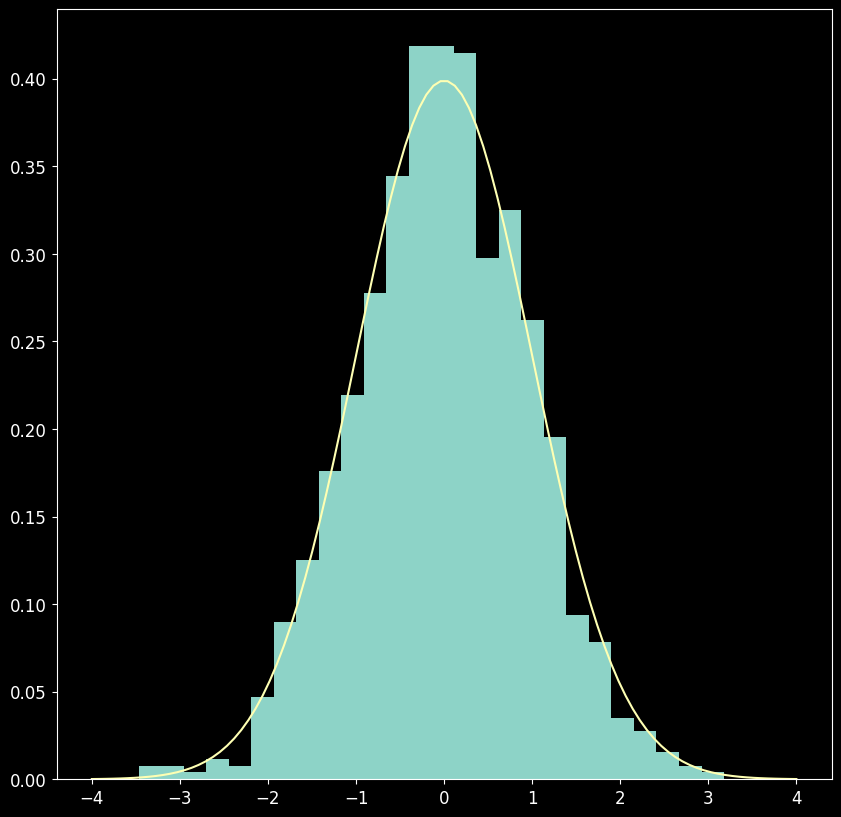

In [ ]:
plt.hist(samples, density=True, bins='auto')
x = np.linspace(4, -4, 100)
y = f(x)
plt.plot(x,y)

In [ ]:
# mean for generating one sample
mean = sum(trials)/1000
std = np.std(trials)
z = scipy.stats.norm.ppf(0.975)
interval = z * std/math.sqrt(1000)
left = mean - interval
right = mean + interval
print("mean of number of samples required to generate 1 random variable is: {}, the confiddence interval is: [{}, {}]".format(mean, left, right))

mean of number of samples required to generate 1 random variable is: 2.636, the confiddence interval is: [2.5585007339906336, 2.7134992660093666]


mean to generate 1000 random variable is: 2636, the confiddence interval is: [2558.5007339906336, 2713.4992660093666]

___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

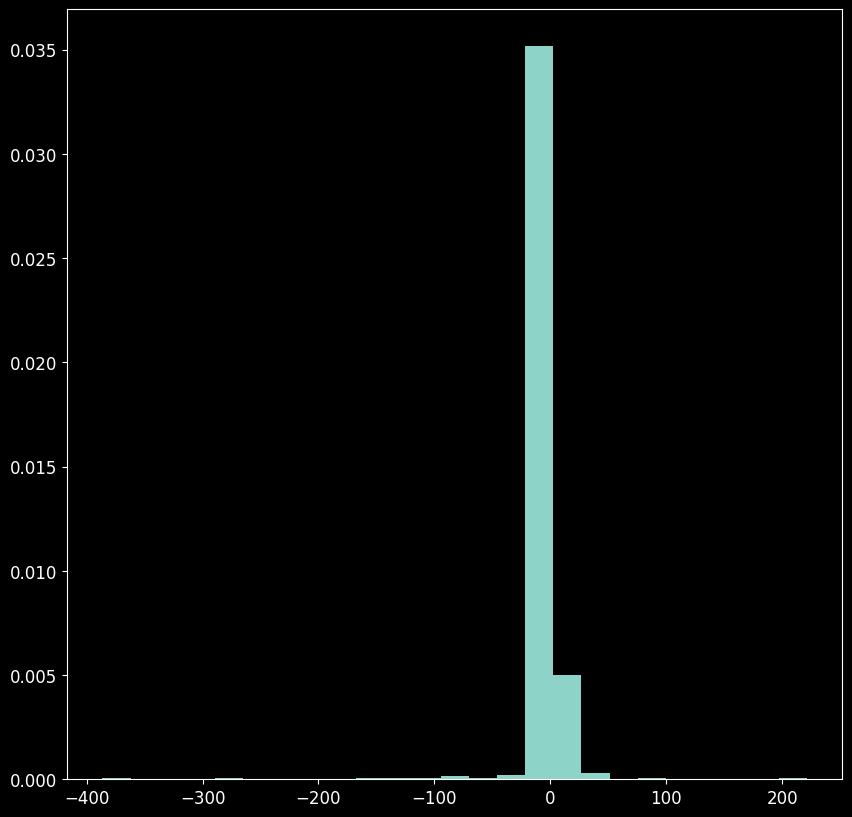

In [ ]:
from scipy.stats import cauchy
n = 1000
rvs = np.random.rand(n)
output = cauchy.ppf(rvs)
plt.hist(output, density=True, bins=25)
plt.show()

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.

\begin{align*}
k \ge max \frac{f(x)}{g(x)} \\
k \ge max\frac{e^{-x^2/2}}{\sqrt{2\pi}} \times \pi(1+x^2) \\
\text{e calculate the derivative and find the x that maximizes the equation} \\
-x(e^{\frac{-x^2}{2}}( x^2 - 1)) = 0 \\
x = 1/-1/0 \\
\end{align*}

In [ ]:
from scipy.stats.distributions import cauchy

f = scipy.stats.norm.pdf
g = cauchy.pdf
k = max([f(x)/g(x) for x in [1,-1,0]])
print("k is {}".format(k))
print("expected number of points needed for 1 randome variable= {}, in total {} is needed".format(k * 2, k * 2 * 1000))

k is 1.520346901066281
expected number of points needed for 1 randome variable= 3.040693802132562, in total 3040.693802132562 is needed


plug in x = 1, we get k that maximizes the equation: 1.52

proposed algorithm:
1.   Draw sample $U \sim $ cauchy distribution.
2.   Draw sample $V \sim Unif[0, k\cdot g(U)]$. $g(x)$ is the pdf of cauchy distribution, k=1.52
3.   If $V < f(U)$, where f is the pdf of normal distribution, then keep $X = U$. Else reject and go back to step 1.

In [ ]:
N = 1000
trials = []
ct = 2
samples = []
while len(samples) < N:
  u = np.random.rand()
  u = cauchy.ppf(u)
  v = np.random.rand()
  if v * k * g(u) <= f(u):
    samples.append(u)
    trials.append(ct)
    ct = 2
  else:
    ct += 2

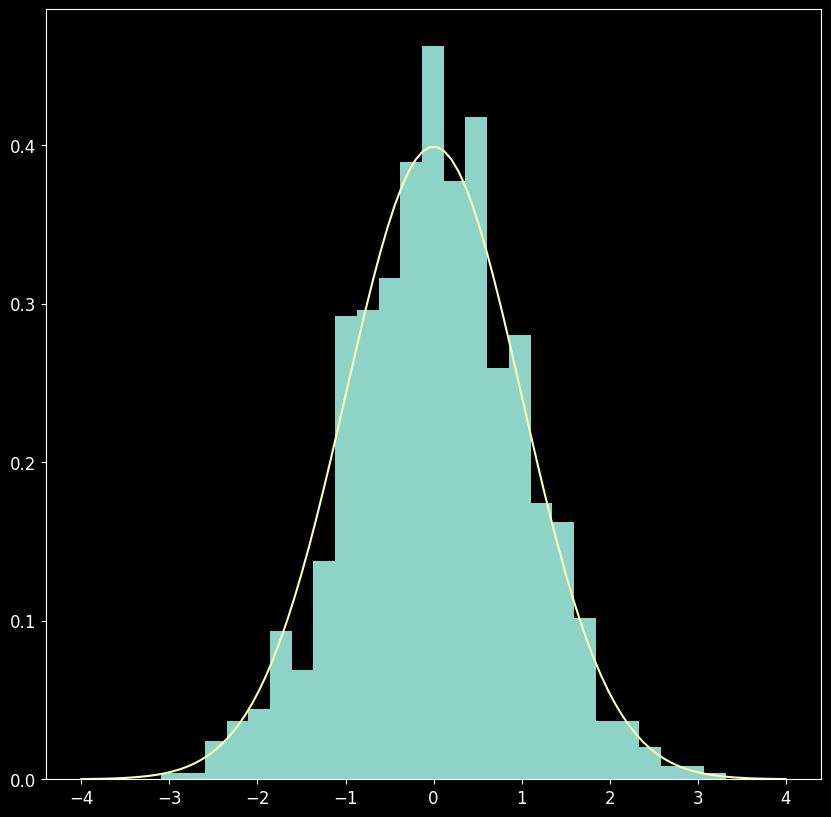

In [ ]:
plt.hist(samples, density=True, bins='auto')
x = np.linspace(4, -4, 100)
y = f(x)
plt.plot(x,y)

In [ ]:
# mean for generating one sample
mean = sum(trials)/1000
std = np.std(trials)
z = scipy.stats.norm.ppf(0.975)
interval = z * std/math.sqrt(1000)
left = mean - interval
right = mean + interval
print("mean of number of samples required to generate 1 random variable is: {}, the confiddence interval is: [{}, {}]".format(mean, left, right))

mean of number of samples required to generate 1 random variable is: 3.052, the confiddence interval is: [2.9378954820563914, 3.1661045179436087]


mean to generate 1000 random variable is: 3052 \
the confidence interval is: [2937.8954820563914, 3166.1045179436087]